# Actividad regresión lineal 2
Francisco Javier Sanchez Panduro A01639832

In [1]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [2]:
df = pd.read_csv('./breast_cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.isnull().sum().sum()

0

## Independencia de las variables regresoras

In [4]:
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
correlation_matrix

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


## Hipótesis nula de los coeficientes de regresión. Estadístico de prueba, distribución del estadístico de prueba. Y prueba de F fischer

In [5]:
import statsmodels.api as sm

X = df.drop(["id", "diagnosis", "radius_mean"], axis=1)
y = df["radius_mean"]
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.072e+04
Date:                Mon, 04 Sep 2023   Prob (F-statistic):               0.00
Time:                        19:10:45   Log-Likelihood:                 821.93
No. Observations:                 569   AIC:                            -1584.
Df Residuals:                     539   BIC:                            -1454.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t

df = df

x = np.linspace(-4, 4, 1000)

y = t.pdf(x, df)

plt.figure(figsize=(12, 6))
plt.plot(x, y, label='Distribución t')

plt.fill_between(x, y, where=np.abs(x) <= 1.96, color='green', alpha=0.5, label='Zona de Aceptación (95%)')

plt.fill_between(x, y, where=np.abs(x) > 1.96, color='red', alpha=0.5, label='Zona de Rechazo (5%)')

plt.title('Distribución del Estadístico de Prueba con Zonas de Aceptación y Rechazo')
plt.xlabel('Valor t')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)

plt.show()


TypeError: '>' not supported between instances of 'str' and 'int'

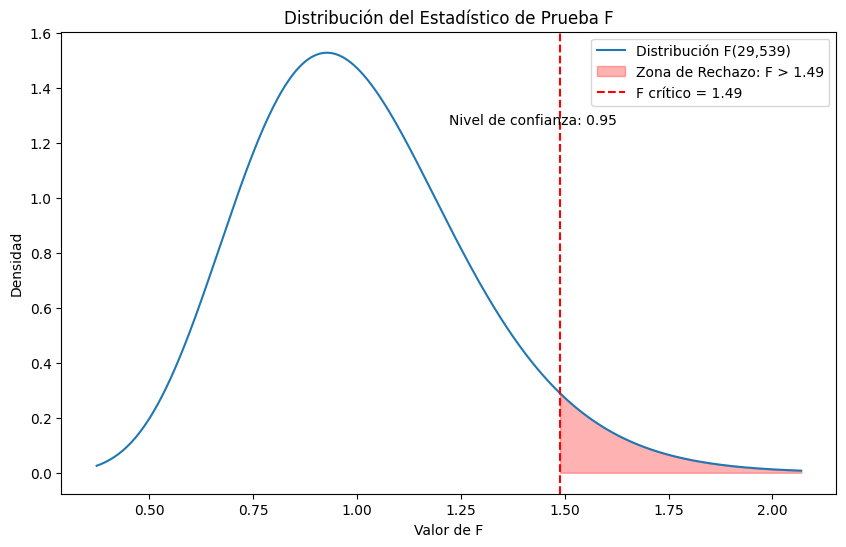

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

dfn = 29  
dfd = 539 

alpha = 0.05
f_critical = stats.f.ppf(1-alpha, dfn, dfd)

x = np.linspace(stats.f.ppf(0.001, dfn, dfd), stats.f.ppf(0.999, dfn, dfd), 1000)
y = stats.f.pdf(x, dfn, dfd)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label=f'Distribución F({dfn},{dfd})')
plt.title('Distribución del Estadístico de Prueba F')
plt.xlabel('Valor de F')
plt.ylabel('Densidad')

plt.fill_between(x, y, where=(x > f_critical), color='red', alpha=0.3, label=f'Zona de Rechazo: F > {f_critical:.2f}')
plt.axvline(f_critical, color='red', linestyle='--', label=f'F crítico = {f_critical:.2f}')

plt.annotate(f'Nivel de confianza: {1-alpha:.2f}', xy=(0.5, 0.8), xycoords='axes fraction')

plt.legend()
plt.show()


In [8]:
import statsmodels.api as sm

def backward_elimination(y, X_vars, df, alpha=0.05):
    while True:
        X = df[X_vars]
        X = sm.add_constant(X)  # Añadir constante para el término del intercepto
        model = sm.OLS(y, X).fit()
        
        # Obtener la variable con el mayor valor p
        p_values = model.pvalues[1:]  # Excluir el término del intercepto
        max_p_value_var = p_values.idxmax()
        max_p_value = p_values.max()
        
        # Eliminar la variable si el valor p es mayor que alpha
        if max_p_value > alpha:
            X_vars.remove(max_p_value_var)
        else:
            break

    return X_vars

# Supongamos que 'y' es la columna objetivo y 'X_vars' es una lista de variables explicativas
y = df['y']
X_vars = ['var1', 'var2', 'var3', 'var4']  # Reemplazar con tus variables explicativas

# Ejecutar la regresión hacia atrás
final_vars = backward_elimination(y, X_vars, df)

print("Variables finales seleccionadas:", final_vars)


KeyError: 'y'